### Comcast Telecom Consumer Complaints .

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Data Dictionary

* Ticket #: Ticket number assigned to each complaint
* Customer Complaint: Description of complaint
* Date: Date of complaint
* Time: Time of complaint
* Received Via: Mode of communication of the complaint
* City: Customer city
* State: Customer state
* Zipcode: Customer zip
* Status: Status of complaint
* Filing on behalf of someone

In [14]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Data imported into python environment

dataset = pd.read_csv('Comcast_telecom_complaints_data.csv')
dataset.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [16]:
dataset['Month'] = dataset.Date_month_year.apply(lambda x: x.split('-',1)[1])
dataset.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Apr-15
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Aug-15
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Apr-15
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Jul-15
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May-15


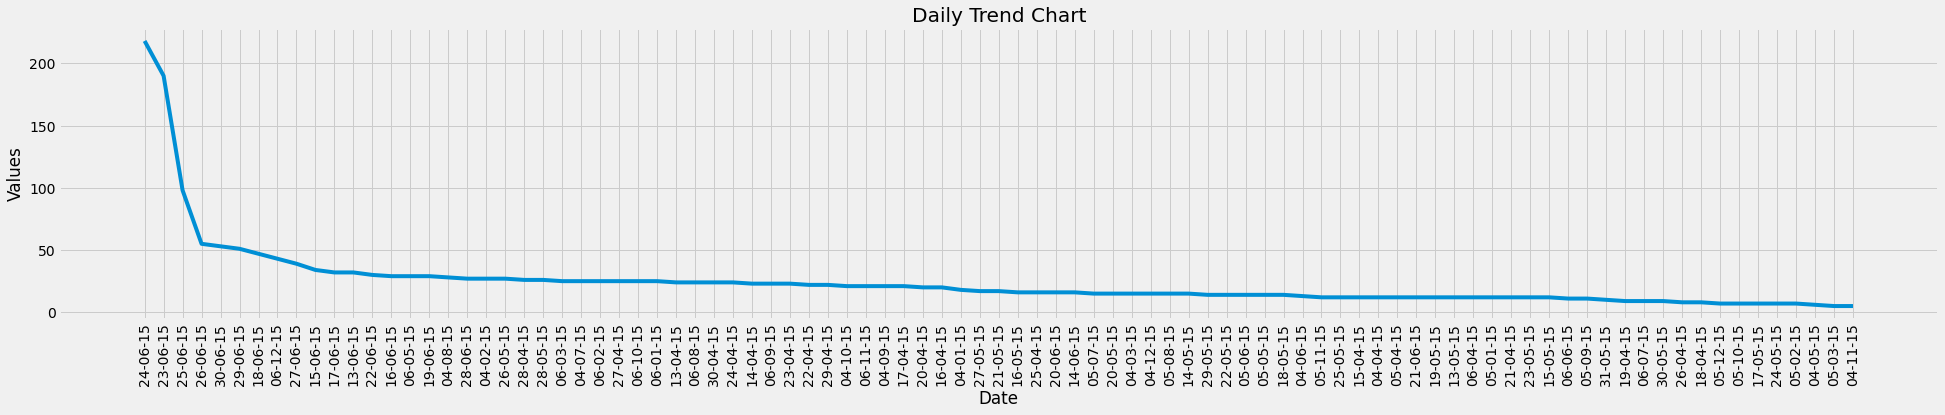

In [59]:
# Trend chart for the number of complaints at daily granularity levels.

plt.style.use("fivethirtyeight")
plt.figure(figsize=(30, 5))
 
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Daily Trend Chart")

trend = dataset["Date"].value_counts()
 
plt.xticks(rotation=90)
plt.plot(trend)

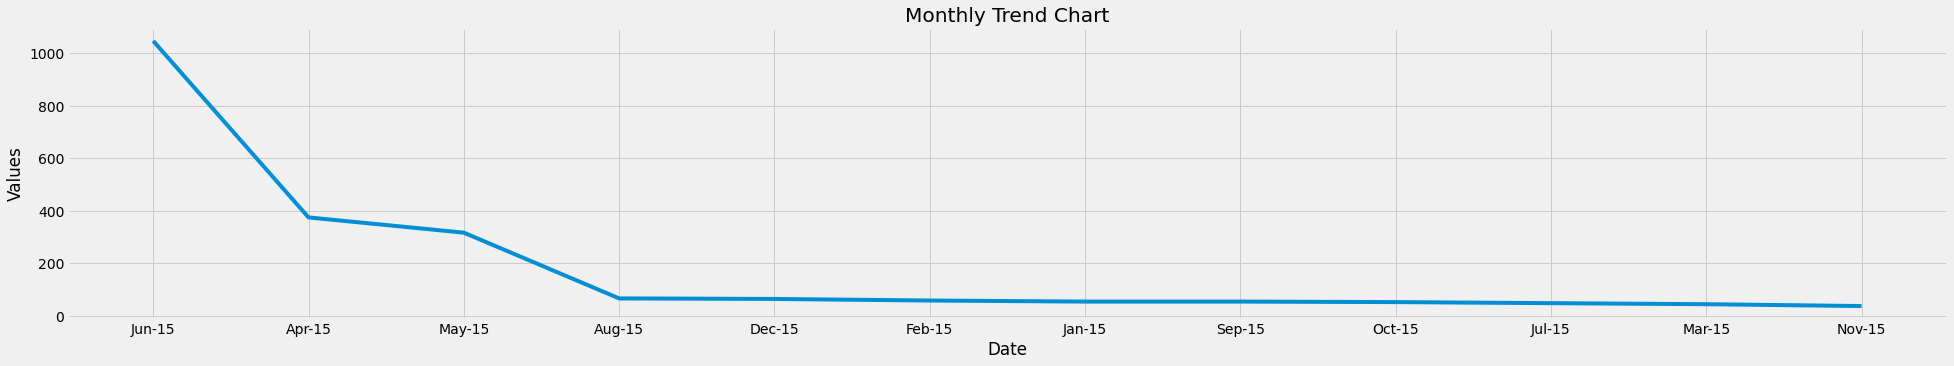

In [61]:
# Trend chart for the number of complaints at monthly granularity levels.

plt.style.use("fivethirtyeight")
plt.figure(figsize=(30, 5))
 
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Monthly Trend Chart")

trend = dataset["Month"].value_counts()

plt.plot(trend)

In [62]:
# Create a new categorical variable based on "Status" column

dataset["Category"] = dataset["Status"].map(lambda x: 'Open' if x in ['Open', 'Pending'] else 'Closed')
dataset.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Category
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Apr-15,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Aug-15,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Apr-15,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Jul-15,Open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May-15,Closed


<AxesSubplot:xlabel='State'>

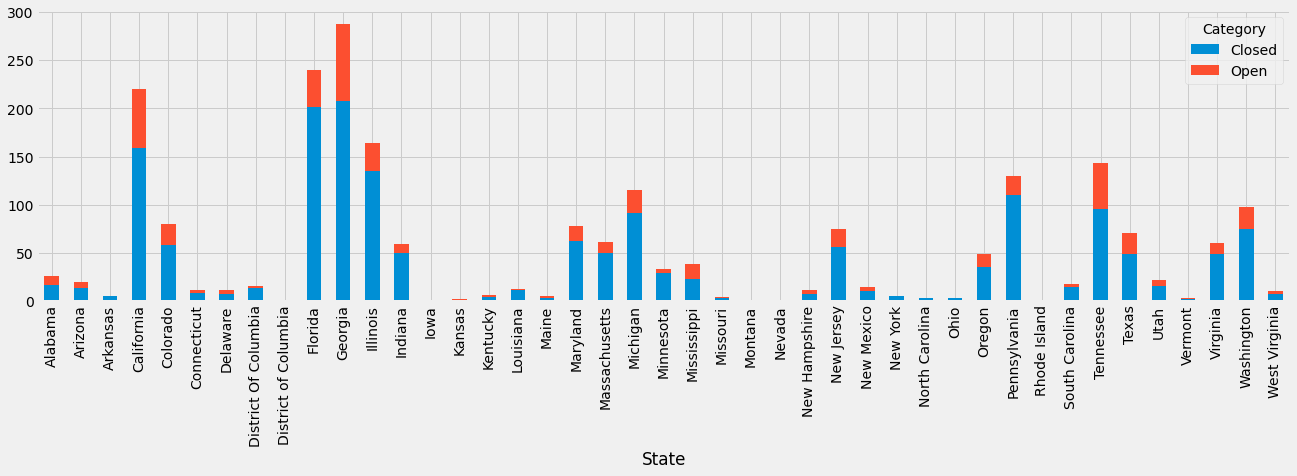

In [90]:
# State wise status of complaints in a stacked bar chart

statewise_compliant = dataset.groupby(["State","Category"]).size().unstack().fillna(0)
statewise_compliant.plot(kind='bar', stacked=True, figsize=(20, 5))

<AxesSubplot:xlabel='State'>

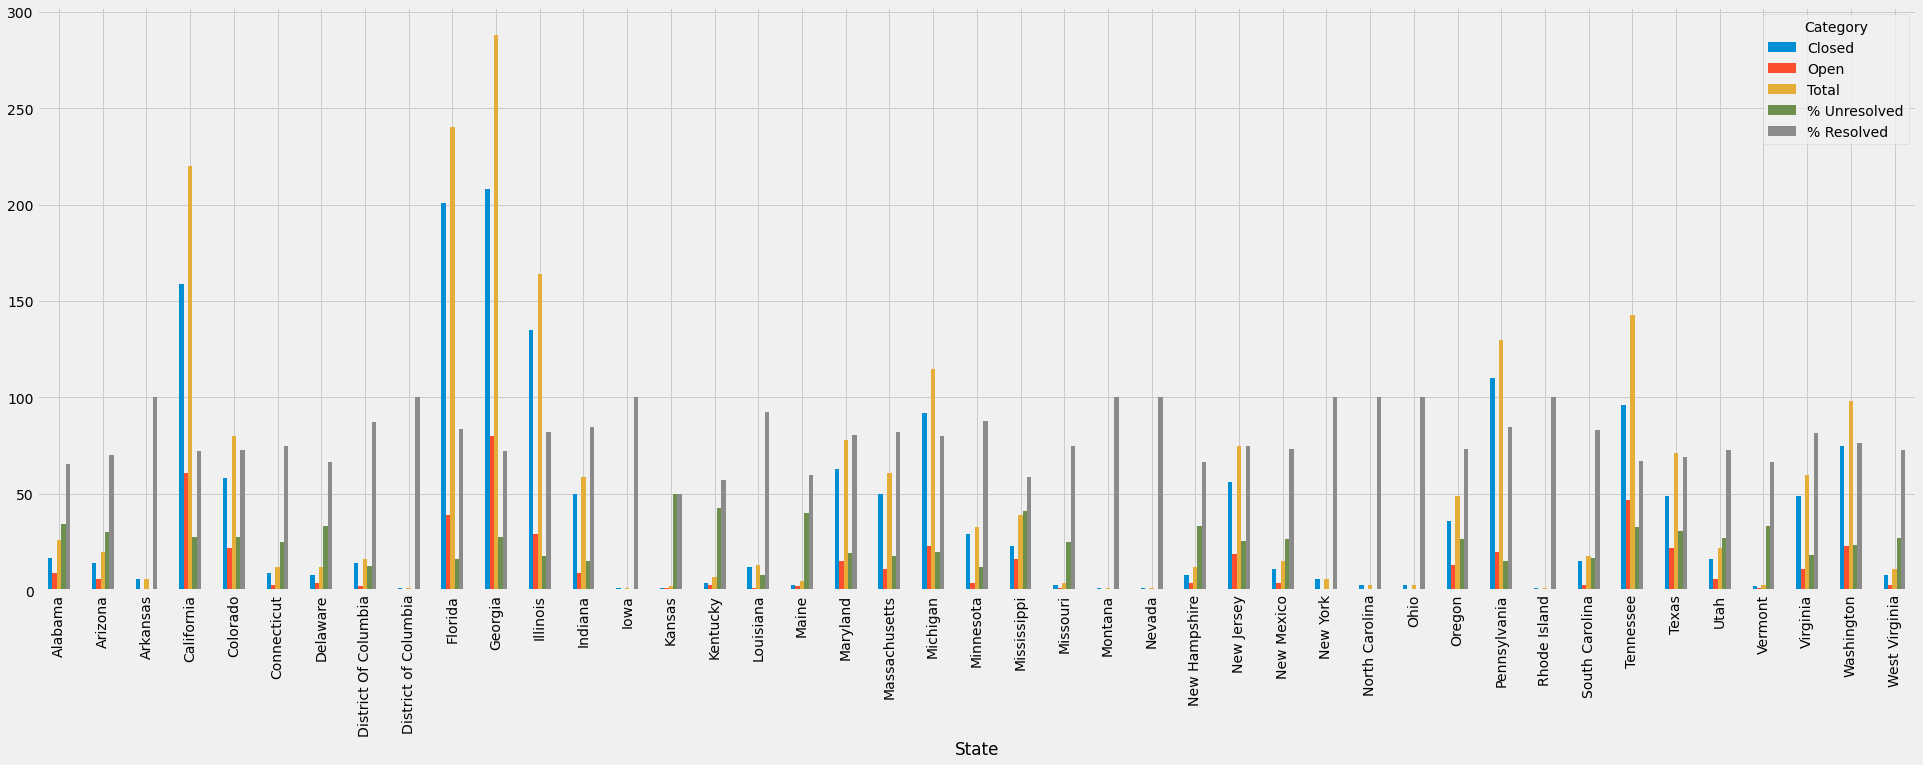

In [106]:
# Insights

statewise_compliant["Total"] = statewise_compliant["Closed"]+statewise_compliant["Open"]
statewise_compliant["% Unresolved"] = statewise_compliant["Open"]/statewise_compliant["Total"]*100
statewise_compliant["% Resolved"] = statewise_compliant["Closed"]/statewise_compliant["Total"]*100
statewise_compliant.plot(kind='bar', figsize=(30, 10))

#### Insights

- Georgia has the highest closed, open and total complaints
- Kansas has the highest % of unresolved complaints (50%)
- States having the highest % of resolved complaints (100%)
    - Arkansas
    - Iowa
    - Montana
    - Nevada
    - New York
    - North Carolina
    - Ohio
    - Rhode Island 